**Data Preprocessing and Analysis**is

</di>


1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Importing the Dataset

In [3]:
df = pd.read_csv("uber.csv")

Pre-process the Dataset

In [5]:
df.head()
df.info()  # Get the required information of the dataset
df.columns  # Get number of columns in the dataset
df = df.drop(['Unnamed: 0', 'key'], axis=1)  # Drop unnecessary columns
df.head()
df.shape  # Get the total (Rows, Columns)
df.dtypes  # Get the type of each column
df.describe()  # Get statistics of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


3. Filling Missing Values

In [7]:
df.isnull().sum()
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(), inplace=True)
df.isnull().sum()
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

4. Converting pickup_datetime to DateTime Format

In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

5. Segregate Date and Time Information

In [11]:
df = df.assign(hour=df.pickup_datetime.dt.hour,
               day=df.pickup_datetime.dt.day,
               month=df.pickup_datetime.dt.month,
               year=df.pickup_datetime.dt.year,
               dayofweek=df.pickup_datetime.dt.dayofweek)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


6. Drop pickup_datetime Column

In [13]:
df = df.drop('pickup_datetime', axis=1)
df.head()
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int32
day                    int32
month                  int32
year                   int32
dayofweek              int32
dtype: object

7. Checking and Treating Outliers

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

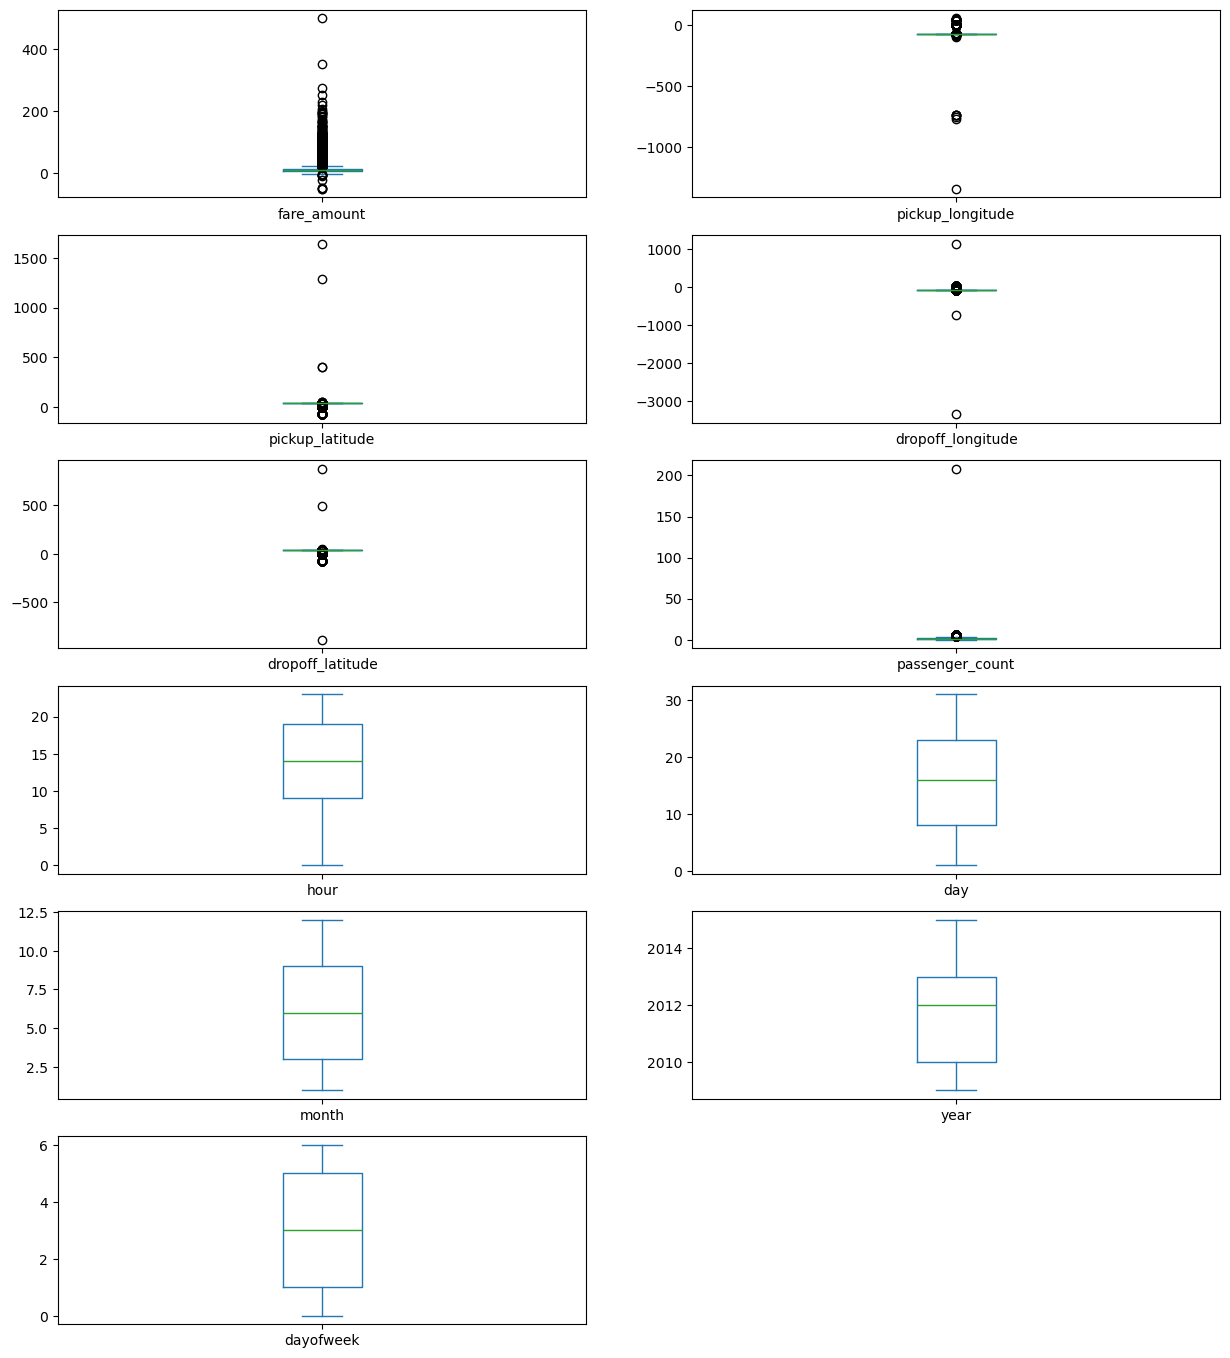

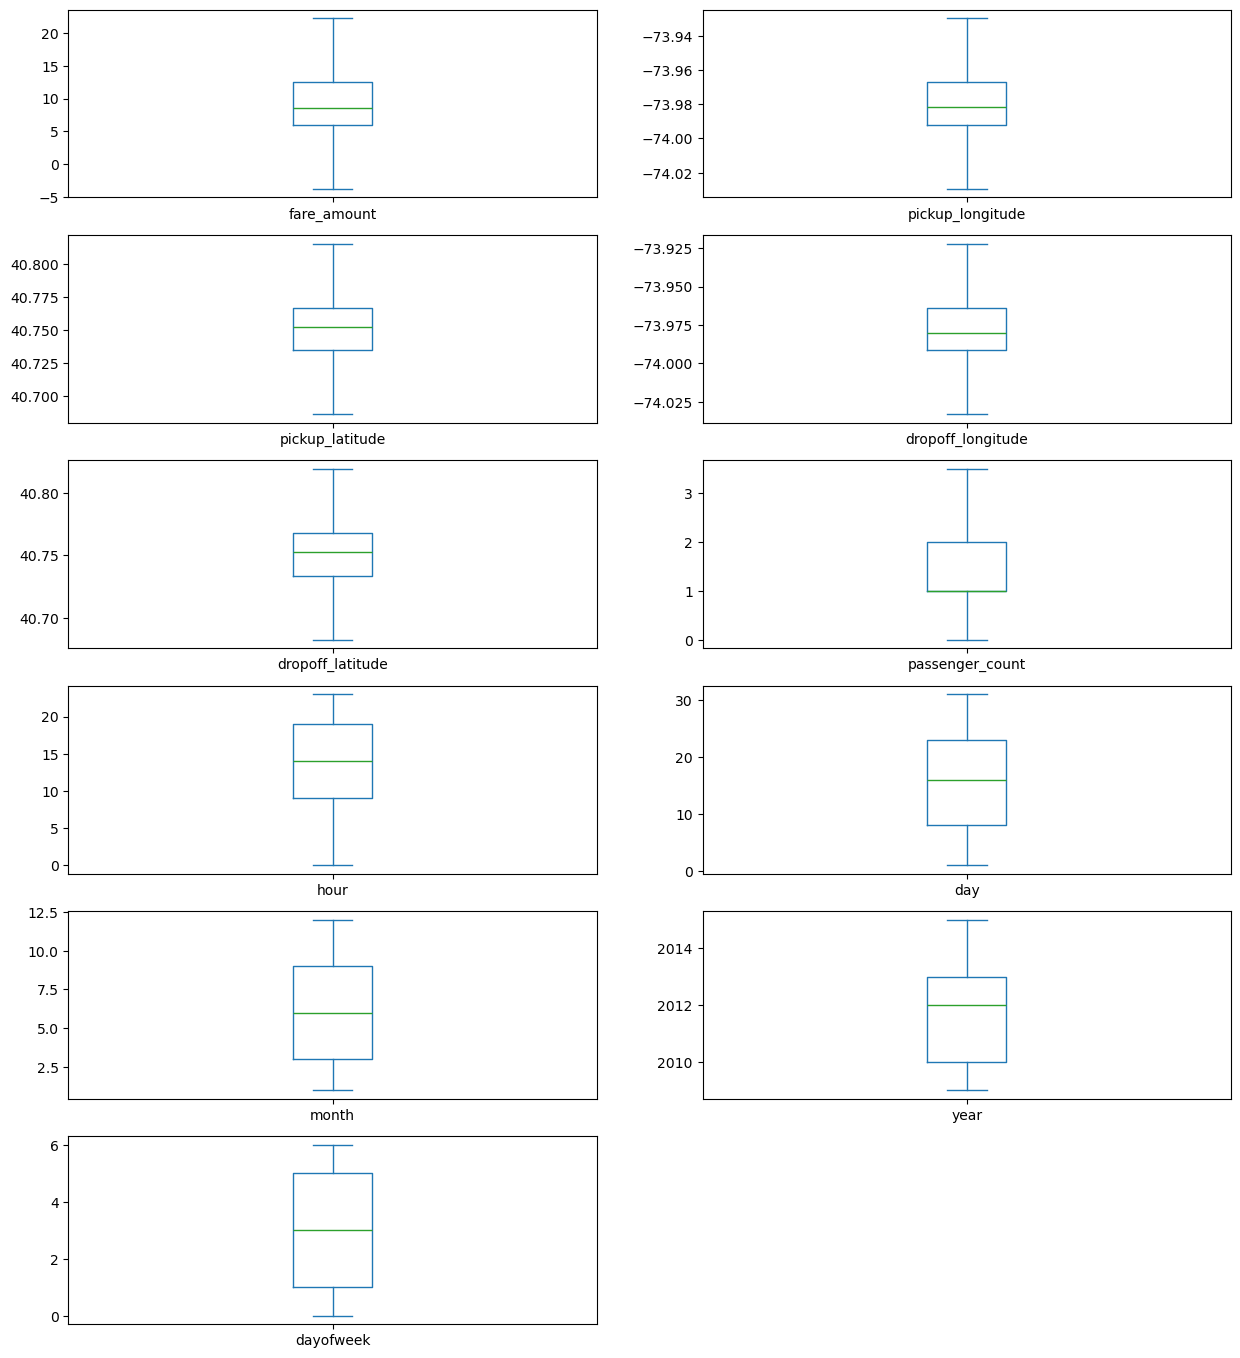

In [15]:
df.plot(kind="box", subplots=True, layout=(7, 2), figsize=(15, 20))  # Boxplot to check outliers

# Using the InterQuartile Range to fill the values
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df, c)
    return df1

df = treat_outliers_all(df, df.iloc[:, 0:])
df.plot(kind="box", subplots=True, layout=(7, 2), figsize=(15, 20))  # Boxplot shows dataset is free from outliers


8. Distance Calculation

In [17]:
# pip install haversine
import haversine as hs  # Calculate the distance using Haversine

travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1, lati1, long2, lati2 = [df['pickup_longitude'][pos], df['pickup_latitude'][pos],
                                  df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]]
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    c = hs.haversine(loc1, loc2)
    travel_dist.append(c)

print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

# Uber doesn't travel over 130 kms, so filter accordingly
df = df.loc[(df.dist_travel_km >= 1) & (df.dist_travel_km <= 130)]
print("Remaining observations in the dataset:", df.shape)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



9. Correcting Latitude and Longitude Values

C:\Users\jadha\AppData\Local\Temp\ipykernel_20560\3388206725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(incorrect_coordinates.index, inplace=True, errors='ignore')


<Axes: >

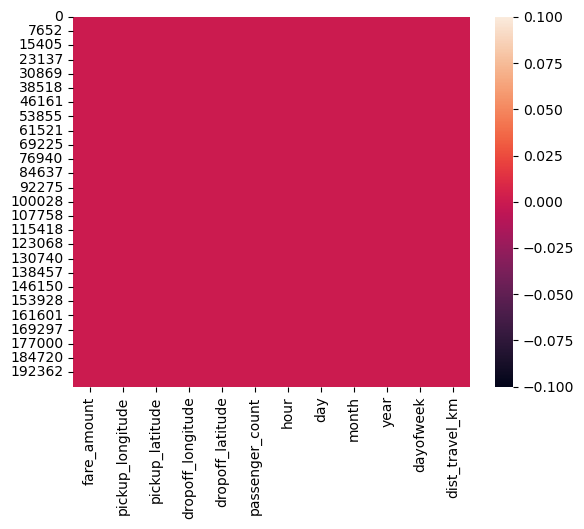

In [19]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) | (df.pickup_latitude < -90) |
                               (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) |
                               (df.pickup_longitude > 180) | (df.pickup_longitude < -180) |
                               (df.dropoff_longitude > 180) | (df.dropoff_longitude < -180)]

df.drop(incorrect_coordinates.index, inplace=True, errors='ignore')
df.head()
df.isnull().sum()
sns.heatmap(df.isnull())  # Check for null values

10. Correlation Analysis

<Axes: >

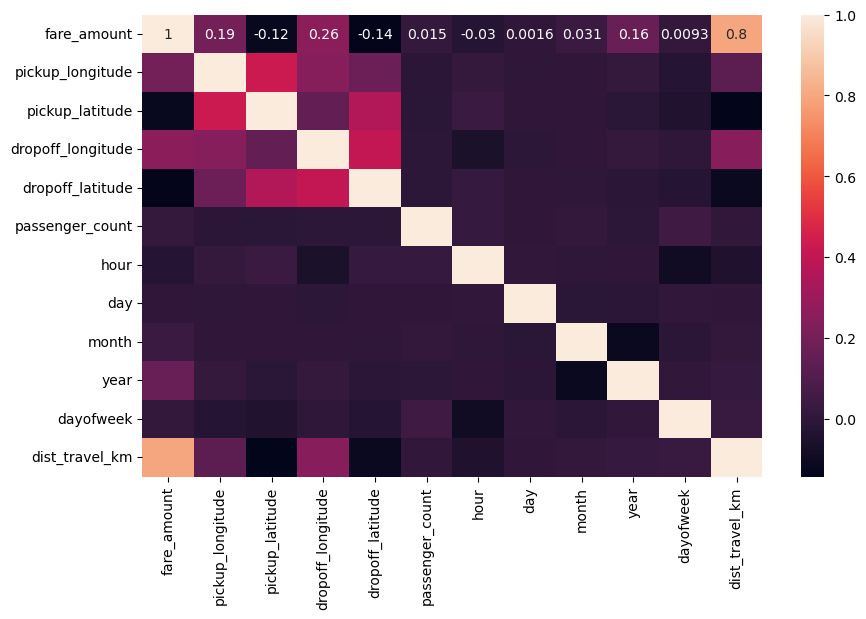

In [21]:
corr = df.corr()  # Find correlation between features
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)  # Correlation Heatmap (Lighter values mean higher correlation)

11. Splitting Dataset into Features and Target

In [23]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
        'passenger_count', 'hour', 'day', 'month', 'year', 'dayofweek', 'dist_travel_km']]
y = df['fare_amount']

12. Splitting Dataset into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

**Model Building and Evaluation**

13. Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

# Coefficients and Intercept
regression.coef_
regression.intercept_

# Predict Target Values
prediction = regression.predict(X_test)
print(prediction)

[15.37641433 16.88640321 17.48428838 ...  8.07061443 16.48631547
 22.64052657]


14. Metrics Evaluation for Linear Regression

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

# R² Score
r2 = r2_score(y_test, prediction)
print("R² Score:", r2)

# Mean Squared Error and Root Mean Squared Error
MSE = mean_squared_error(y_test, prediction)
print("Mean Squared Error:", MSE)

RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)

R² Score: 0.6836547594021576
Mean Squared Error: 9.128644439247083
Root Mean Squared Error: 3.0213646650556902


15. Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, max_depth=10, max_features='sqrt')
rf.fit(X_train, y_train)

# Predict Target Values
y_pred = rf.predict(X_test)
print(y_pred)

[15.23056103 20.12886551 15.66219915 ...  7.46070115 16.00819572
 21.07381536]


16. Metrics Evaluation for Random Forest Regression

In [36]:
R2_Random = r2_score(y_test, y_pred)
print("Random Forest R² Score:", R2_Random)

MSE_Random = mean_squared_error(y_test, y_pred)
print("Random Forest Mean Squared Error:", MSE_Random)

RMSE_Random = np.sqrt(MSE_Random)
print("Random Forest Root Mean Squared Error:", RMSE_Random)


Random Forest R² Score: 0.8036533573371974
Random Forest Mean Squared Error: 5.665894275258621
Random Forest Root Mean Squared Error: 2.3803139026730533
